<a href="https://colab.research.google.com/github/AdityaBytes/Flood_Detection/blob/main/Flood_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('India_Flood_Inventory_v3.csv')
data.columns = data.columns.str.strip()
data.head()

Index(['ï»¿Unnamed: 0', 'UEI', 'Start Date', 'End Date', 'Duration(Days)',
       'Main Cause', 'Location', 'Districts', 'State', 'Latitude', 'Longitude',
       'Severity', 'Area Affected', 'Human fatality', 'Human injured',
       'Human Displaced', 'Animal Fatality',
       'Description of Casualties/injured', 'Extent of damage', 'Event Source',
       'Event Souce ID', 'District_LGD_Codes', 'State_Codes'],
      dtype='object')

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Load the dataset
data = pd.read_csv('India_Flood_Inventory_v3.csv')

# Strip any whitespace from the column names
data.columns = data.columns.str.strip()

# Convert the 'Start Date' column to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')

# Filter for rows where the state is 'Assam' and the start date is within the last 2 years
two_years_ago = datetime.now() - timedelta(days=2*365)
assam_last_two_years = data[(data['State'].str.strip().str.lower() == 'assam') & (data['Start Date'] >= two_years_ago)]

# Display the filtered rows
assam_last_two_years.head()


,ï»¿Unnamed: 0,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,...,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID,District_LGD_Codes,State_Codes
5161,5724,UEI-IMD-FL-2022-0078,2022-12-05,13-05-2022 00:00,2.0,"Heavy rains, Floods (Brahmaputra,tributaries) ...",NaN,Cachar,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,282,18
5162,5725,UEI-IMD-FL-2022-0079,2022-12-05,13-05-2022 00:00,2.0,"Heavy rains, Floods (Brahmaputra,tributaries) ...",NaN,Dhemaji,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,284,18
5163,5726,UEI-IMD-FL-2022-0080,2022-12-05,13-05-2022 00:00,2.0,"Heavy rains, Floods (Brahmaputra,tributaries) ...",NaN,Dima Hasao,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,299,18
5164,5727,UEI-IMD-FL-2022-0081,2022-12-05,13-05-2022 00:00,2.0,"Heavy rains, Floods (Brahmaputra,tributaries) ...",NaN,Hojai,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,709,18
5165,5728,UEI-IMD-FL-2022-0082,2022-12-05,13-05-2022 00:00,2.0,"Heavy rains, Floods (Brahmaputra,tributaries) ...",NaN,Kamrup Metro,Assam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,IMD,NaN,618,18


<ipython-input-1-b18203b33a25>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


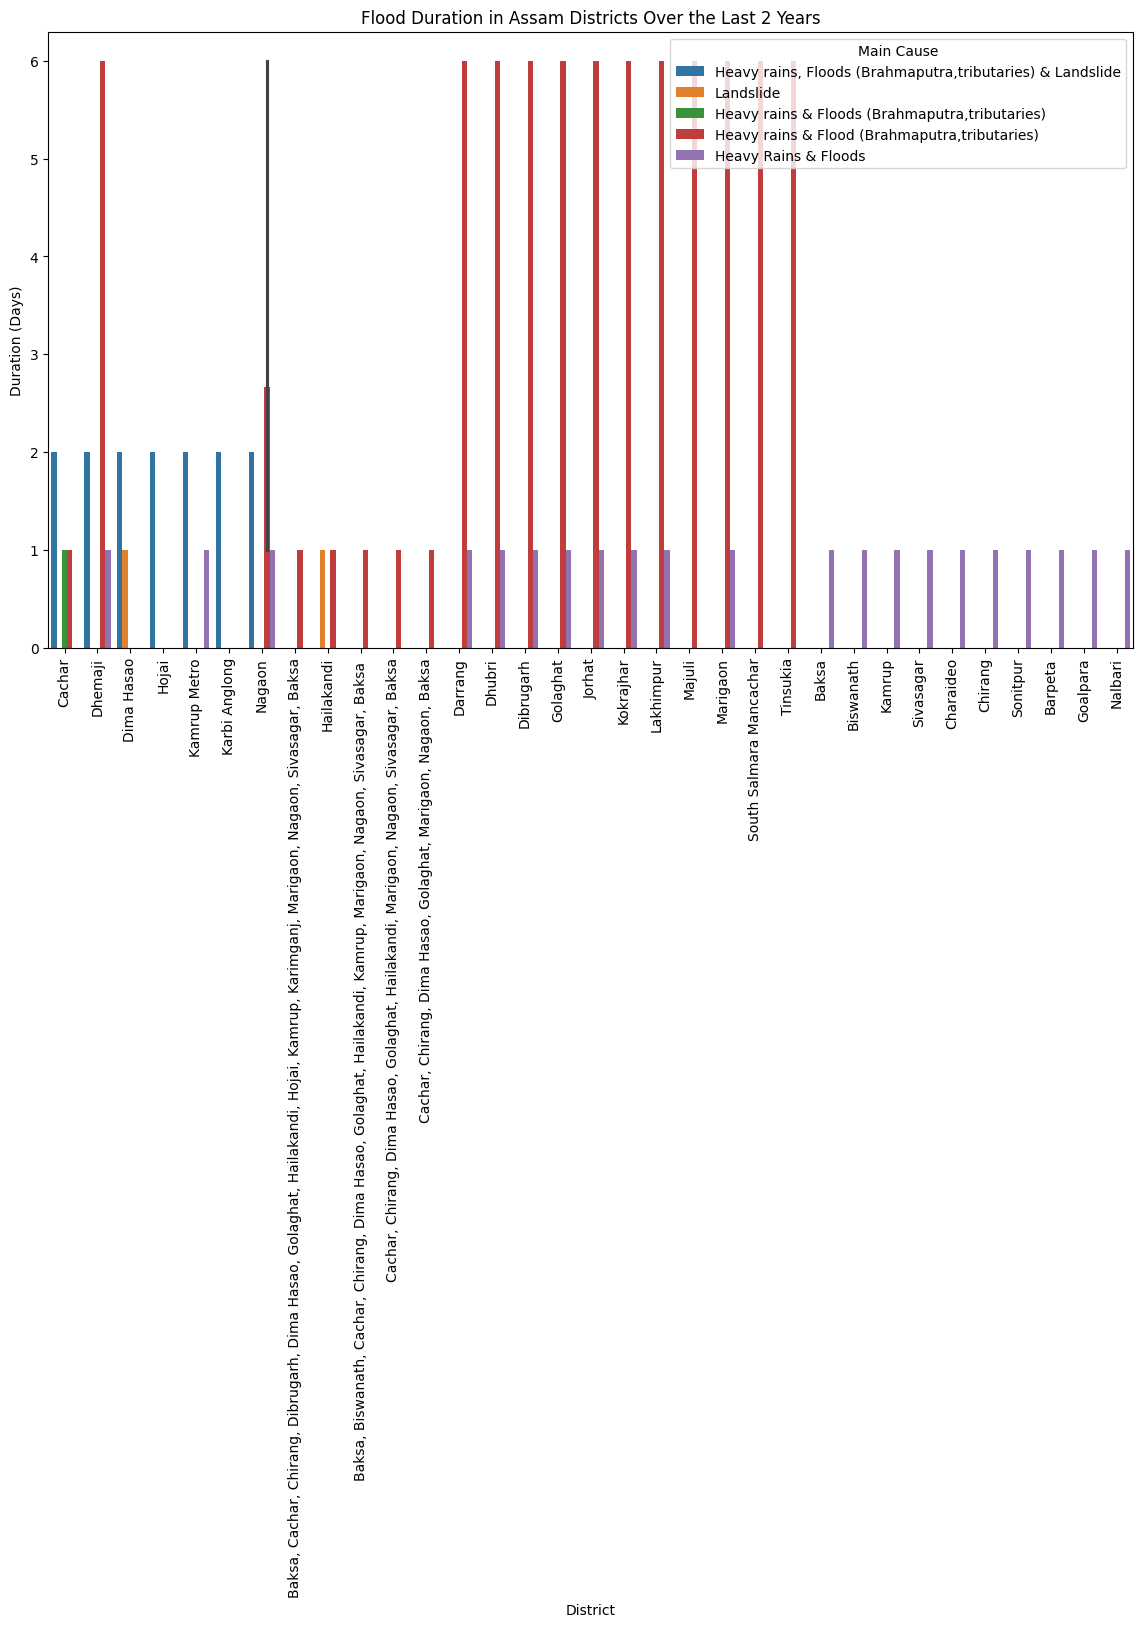

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('India_Flood_Inventory_v3.csv')

# Strip any whitespace from the column names
data.columns = data.columns.str.strip()

# Convert the 'Start Date' and 'End Date' columns to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Define the date range for the last 2 years
two_years_ago = datetime.now() - timedelta(days=2*365)

# Filter for rows where the state is 'Assam' and the start date is within the last 2 years
filtered_data = data[
    (data['State'].str.strip().str.lower() == 'assam') &
    (data['Start Date'] >= two_years_ago)
]

# Select the required columns
filtered_data = filtered_data[['Districts', 'Start Date', 'End Date', 'Duration(Days)', 'Main Cause']]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Districts', y='Duration(Days)', hue='Main Cause', data=filtered_data, dodge=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Flood Duration in Assam Districts Over the Last 2 Years')
plt.xlabel('District')
plt.ylabel('Duration (Days)')

# Save the plot as an image file
plt.legend(title='Main Cause')
plt.tight_layout()
# plt.savefig('/mnt/data/flood_duration_assam.png')
plt.show()


In [ ]:
print(filtered_data)

         Districts Start Date   End Date  Duration(Days)  \
5161        Cachar 2022-12-05        NaT             2.0   
5162       Dhemaji 2022-12-05        NaT             2.0   
5163    Dima Hasao 2022-12-05        NaT             2.0   
5164         Hojai 2022-12-05        NaT             2.0   
5165  Kamrup Metro 2022-12-05        NaT             2.0   
...            ...        ...        ...             ...   
6467        Kamrup 2023-02-09 2023-02-09             1.0   
6468  Kamrup Metro 2023-02-09 2023-02-09             1.0   
6469      Marigaon 2023-02-09 2023-02-09             1.0   
6470        Nagaon 2023-02-09 2023-02-09             1.0   
6471     Sivasagar 2023-02-09 2023-02-09             1.0   

                                             Main Cause  
5161  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5162  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5163  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5164  Heavy rains, Floods (Brahmaputra,tributar

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('India_Flood_Inventory_v3.csv')

# Strip any whitespace from the column names
data.columns = data.columns.str.strip()

# Convert the 'Start Date' and 'End Date' columns to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Remove rows with NaT values in 'Start Date' or 'End Date'
data = data.dropna(subset=['Start Date', 'End Date'])

# Define the date range for the last 2 years
two_years_ago = datetime.now() - timedelta(days=2*365)

# Filter for rows where the state is 'Assam' and the start date is within the last 2 years
filtered_data = data[
    (data['State'].str.strip().str.lower() == 'assam') &
    (data['Start Date'] >= two_years_ago)
]

# Select the required columns
filtered_data = filtered_data[['Districts', 'Start Date', 'End Date']]

# Sort data by 'Start Date'
filtered_data = filtered_data.sort_values('Start Date')

# Create the Gantt chart
plt.figure(figsize=(14, 8))

# Create a list of colors for different districts
unique_districts = filtered_data['Districts'].unique()
colors = plt.colormaps.get_cmap('tab20', len(unique_districts))

# Plot each flood event
for i, (index, row) in enumerate(filtered_data.iterrows()):
    district_index = list(unique_districts).index(row['Districts'])
    plt.plot([row['Start Date'], row['End Date']], [i, i], color=colors(district_index), linewidth=6)
    plt.text(row['End Date'] + timedelta(days=1), i, row['Districts'], verticalalignment='center', fontsize=8)

# Formatting the plot
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().invert_yaxis()
plt.xlabel('Date')
plt.ylabel('Flood Events')
plt.title('Flood Events in Assam Over the Last 2 Years')

plt.tight_layout()
plt.show()


TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

<Figure size 1400x800 with 0 Axes>

In [ ]:

# Convert 'Start Date' to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], format='%d-%m-%Y', errors='coerce')

# Define the date range
start_date = '2022-01-01'
end_date = '2024-12-31'

# Filter the data for the date range
filtered_data = data[(data['Start Date'] >= start_date) & (data['Start Date'] <= end_date)]

# Display the filtered data
print(filtered_data)

# Filter using the query method
filtered_data = data.query('`Start Date` >= "2022-01-01" and `Start Date` <= "2024-12-31"')

# Display the filtered data
print(filtered_data)


Empty DataFrame
Columns: [ï»¿Unnamed: 0, UEI, Start Date, End Date, Duration(Days), Main Cause, Location, Districts, State, Latitude, Longitude, Severity, Area Affected, Human fatality, Human injured, Human Displaced, Animal Fatality, Description of Casualties/injured, Extent of damage, Event Source, Event Souce ID, District_LGD_Codes, State_Codes]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [ï»¿Unnamed: 0, UEI, Start Date, End Date, Duration(Days), Main Cause, Location, Districts, State, Latitude, Longitude, Severity, Area Affected, Human fatality, Human injured, Human Displaced, Animal Fatality, Description of Casualties/injured, Extent of damage, Event Source, Event Souce ID, District_LGD_Codes, State_Codes]
Index: []

[0 rows x 23 columns]


In [ ]:
data.isnull().sum()

ï»¿Unnamed: 0                           0
UEI                                     0
Start Date                             20
End Date                               20
Duration(Days)                         19
Main Cause                             31
Location                             6876
Districts                              60
State                                   0
Latitude                             6876
Longitude                            6876
Severity                             6876
Area Affected                        6876
Human fatality                       3106
Human injured                        5818
Human Displaced                      6754
Animal Fatality                      6305
Description of Casualties/injured    3609
Extent of damage                     3121
Event Source                            0
Event Souce ID                       6876
District_LGD_Codes                    304
State_Codes                           258
dtype: int64

In [ ]:
 data_num=data.select_dtypes(include=['float64','int64'])
data_num.isnull().sum()

ï»¿Unnamed: 0        0
Duration(Days)      19
Location          6876
Latitude          6876
Longitude         6876
Severity          6876
Area Affected     6876
Human fatality    3106
Human injured     5818
Event Souce ID    6876
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
data_num_interpolated = data_num.interpolate(method='linear', limit_direction='both')

null_counts_interpolated = data_num_interpolated.isnull().sum()

# Print the results
print("Number of null values in each column after interpolation:")
print(null_counts_interpolated)


Number of null values in each column after interpolation:
ï»¿Unnamed: 0        0
Duration(Days)       0
Location          6876
Latitude          6876
Longitude         6876
Severity          6876
Area Affected     6876
Human fatality       0
Human injured        0
Event Souce ID    6876
dtype: int64


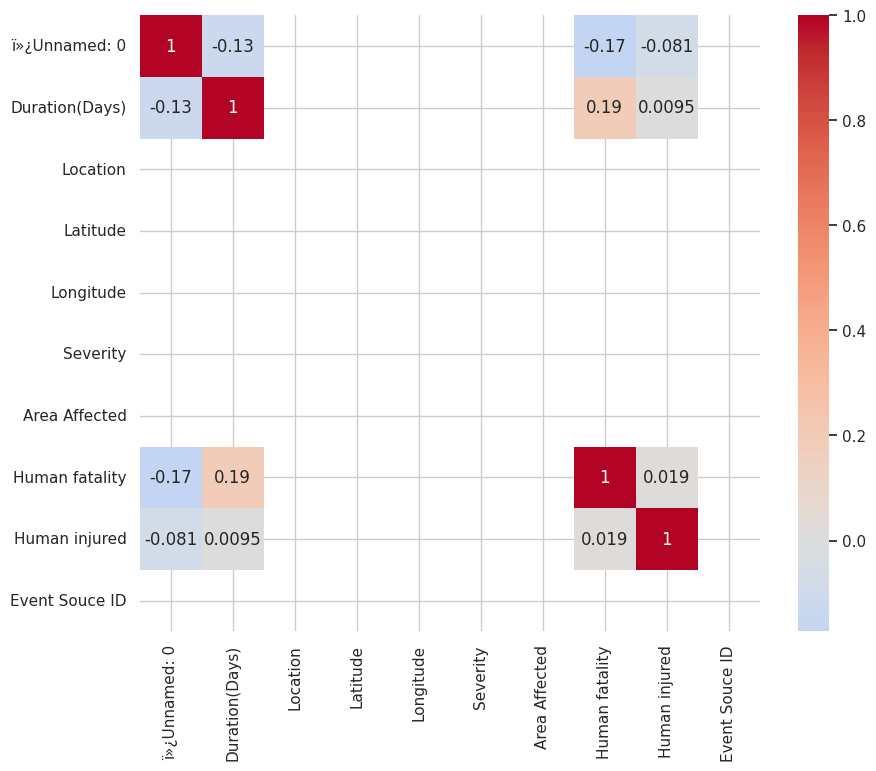

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix =data_num_interpolated.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


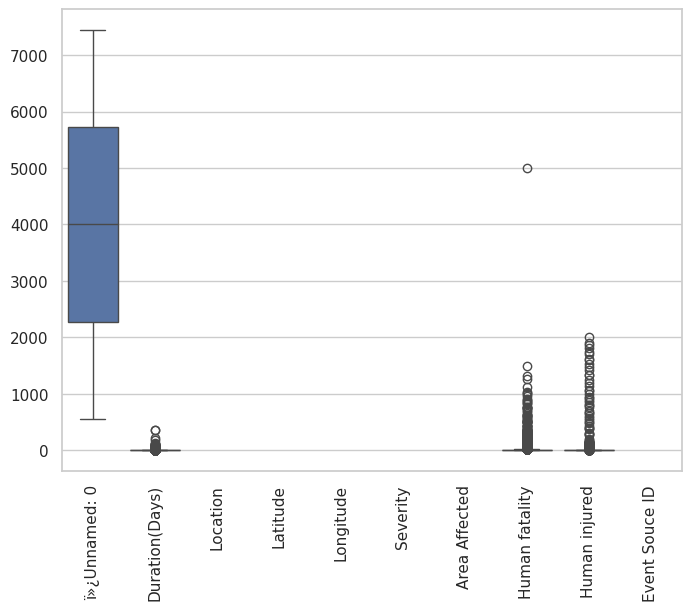

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_num_interpolated)
plt.xticks(rotation=90)
plt.show()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Unnamed: 0   6876 non-null   int64  
 1   Duration(Days)  6876 non-null   float64
 2   Location        0 non-null      float64
 3   Latitude        0 non-null      float64
 4   Longitude       0 non-null      float64
 5   Severity        0 non-null      float64
 6   Area Affected   0 non-null      float64
 7   Human fatality  6876 non-null   float64
 8   Human injured   6876 non-null   float64
 9   Event Souce ID  0 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 537.3 KB
None
Data Description:
       ï»¿Unnamed: 0  Duration(Days)  Location  Latitude  Longitude  Severity  \
count    6876.000000     6876.000000       0.0       0.0        0.0       0.0   
mean     4000.500000        3.605876       NaN       NaN        NaN       NaN   
std      1985.074558    

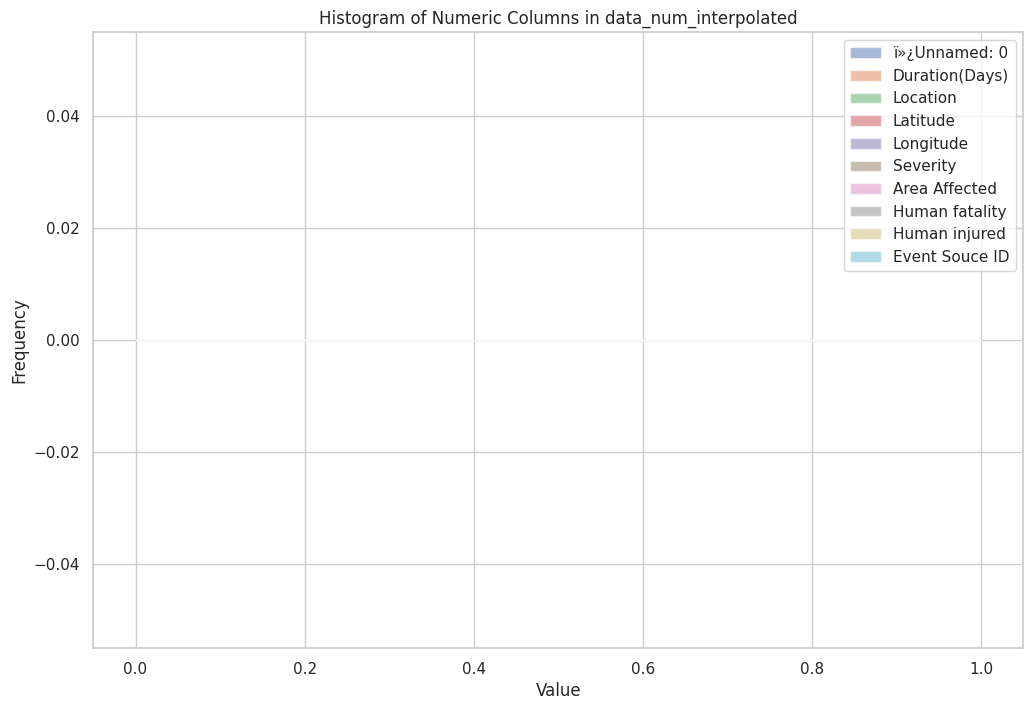

In [ ]:
print("Data Info:")
print(data_num_interpolated.info())
print("Data Description:")
print(data_num_interpolated.describe())

# Step 2: Verify Null Values Handling
print("Null values before additional handling:")
print(data_num_interpolated.isnull().sum())

# Option 1: Drop rows with any NaN values
data_num_interpolated_clean = data_num_interpolated.dropna()

# Option 2: Fill remaining NaN values with a specific value, such as the mean or median
# data_num_interpolated_clean = data_num_interpolated.fillna(data_num_interpolated.mean())

# Verify no NaN values remain
print("Null values after additional handling:")
print(data_num_interpolated_clean.isnull().sum())

# Step 3: Check DataFrame Structure
print("Cleaned Data Info:")
print(data_num_interpolated_clean.info())

plt.figure(figsize=(12, 8))

# Plot histograms for each column in data_num_interpolated_clean
for column in data_num_interpolated_clean.columns:
    plt.hist(data_num_interpolated_clean[column], bins=20, alpha=0.5, label=column)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Columns in data_num_interpolated')

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()


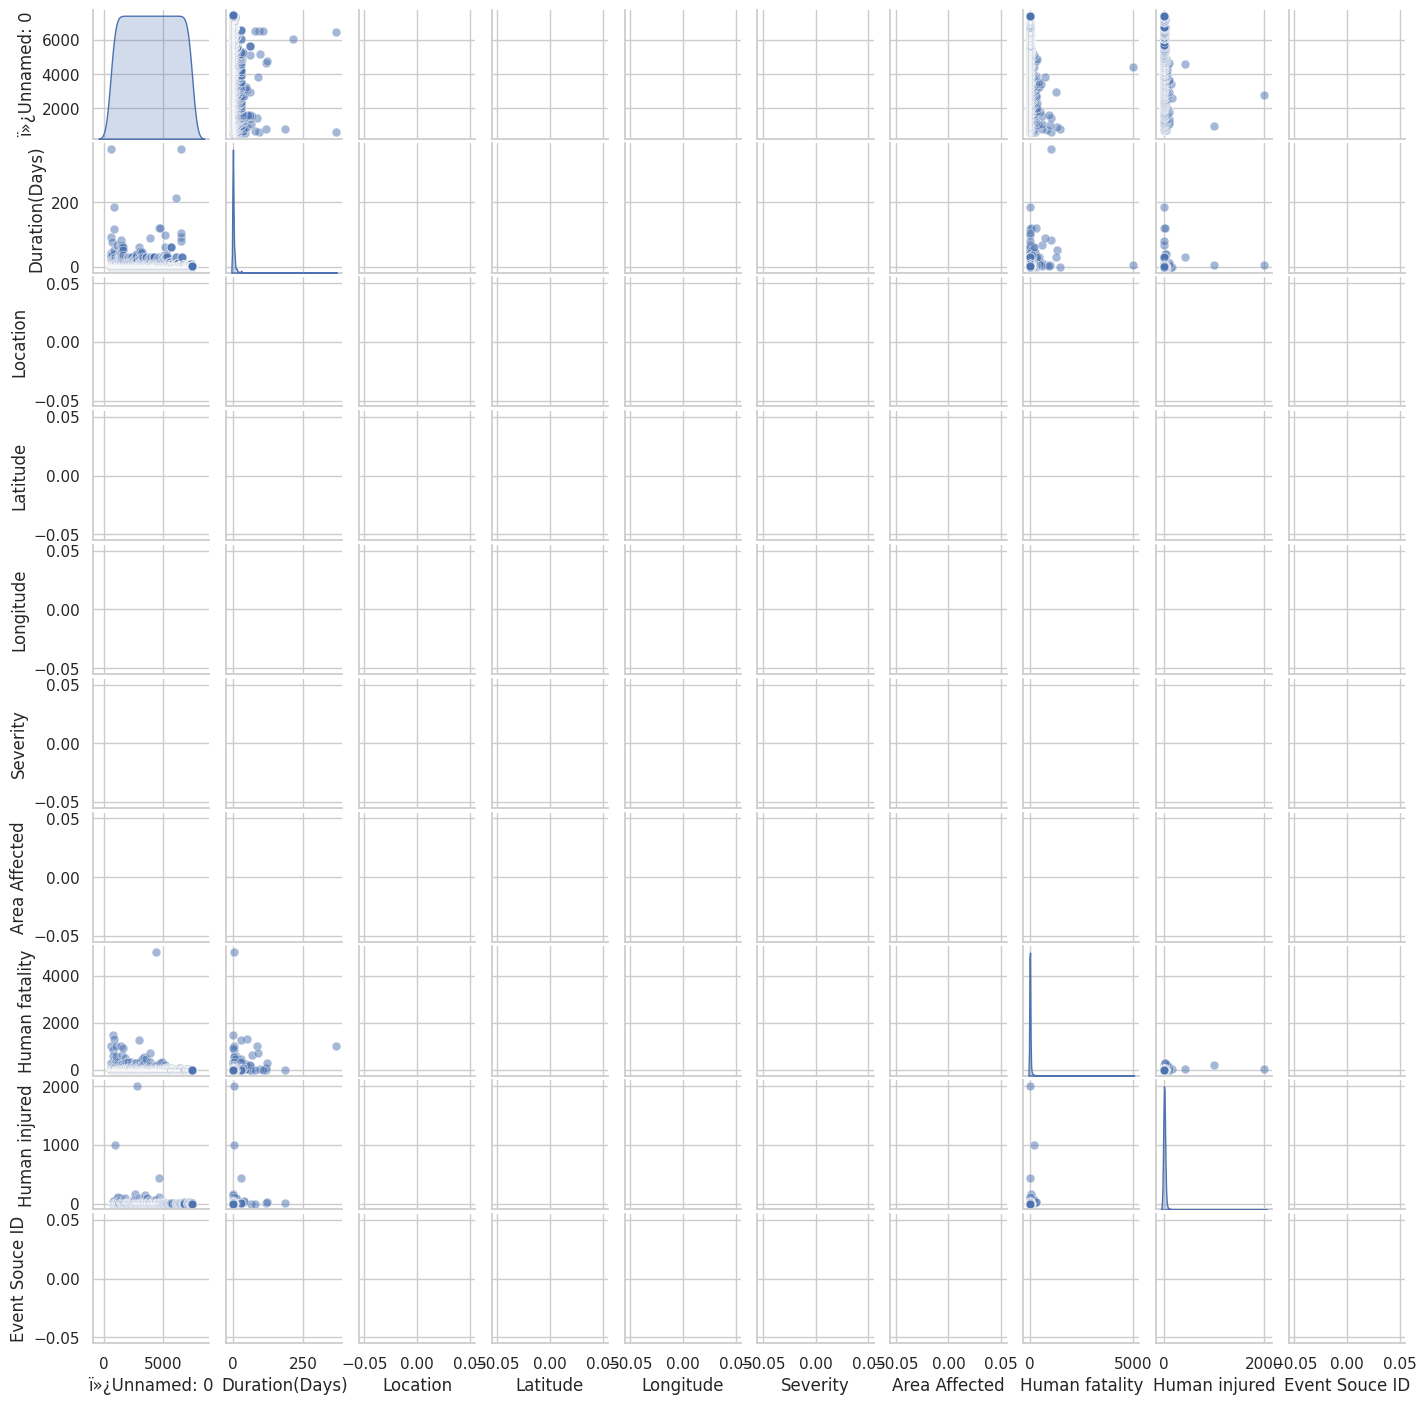

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

pair_plot = sns.pairplot(
    data=data_num,
    diag_kind='kde',  # Add KDE plots on the diagonals
    plot_kws={'alpha':0.5, 's':40},  # Adjust marker transparency and size
    markers='o'
)

# Adjust the size of the plot
pair_plot.fig.set_size_inches(14, 14)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import datetime
from google.colab import files
from urllib.parse import quote

# Define end date as today and start date as 2 years ago
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)

print(start_date, end_date)

# Define a list of states, districts, and stations
locations = [
    {"state": "UTTARAKHAND", "district": "DEHRADUN", "station": "MUSSOORIE(UKG)_UKG"},
    {"state": "MAHARASHTRA", "district": "MUMBAI", "station": "SANTACRUZ(A)_MCB"},
    {"state": "DELHI", "district": "NEW DELHI", "station": "PALAM(A)_D"},

]

all_dataframes = []

for loc in locations:
    state = loc["state"]
    district = loc["district"]
    station = loc["station"]

    url = "http://aws.imd.gov.in:8091/AWS/dataview.php?a=AWS&b={}&c={}&d={}&e={}&f={}&g=ALL_HOUR&h=ALL_MINUTE".format(
        quote(state), quote(district), quote(station), start_date, end_date
    )
    print(f"Fetching data from URL: {url}")

    try:
        df_list = pd.read_html(url)
        if not df_list:
            print(f"No data found for {station}")
            continue

        for df in df_list:
            df["State"] = state
            df["District"] = district
            df["Station"] = station
            all_dataframes.append(df)
            print(f"Data fetched for {station}")
    except Exception as e:
        print(f"Failed to fetch data for {station}. Error: {e}")

if all_dataframes:
    final_df = pd.concat(all_dataframes, ignore_index=True)

    excel_file = 'IMD_data_multiple_locations.xlsx'
    with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
        final_df.to_excel(writer, sheet_name='All_Data', index=False)

    print(f'Data saved to {excel_file}')

    files.download(excel_file)
else:
    print("No data fetched for any location.")


2022-06-19 2024-06-18
Fetching data from URL: http://aws.imd.gov.in:8091/AWS/dataview.php?a=AWS&b=UTTARAKHAND&c=DEHRADUN&d=MUSSOORIE%28UKG%29_UKG&e=2022-06-19&f=2024-06-18&g=ALL_HOUR&h=ALL_MINUTE
Data fetched for MUSSOORIE(UKG)_UKG
Fetching data from URL: http://aws.imd.gov.in:8091/AWS/dataview.php?a=AWS&b=MAHARASHTRA&c=MUMBAI&d=SANTACRUZ%28A%29_MCB&e=2022-06-19&f=2024-06-18&g=ALL_HOUR&h=ALL_MINUTE
Data fetched for SANTACRUZ(A)_MCB
Fetching data from URL: http://aws.imd.gov.in:8091/AWS/dataview.php?a=AWS&b=DELHI&c=NEW%20DELHI&d=PALAM%28A%29_D&e=2022-06-19&f=2024-06-18&g=ALL_HOUR&h=ALL_MINUTE
Data fetched for PALAM(A)_D
Data saved to IMD_data_multiple_locations.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State: UTTARAKHAND
District: DEHRADUN
Station: MUSSOORIE(UKG)_UKG


<ipython-input-15-3252054d2f75>:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


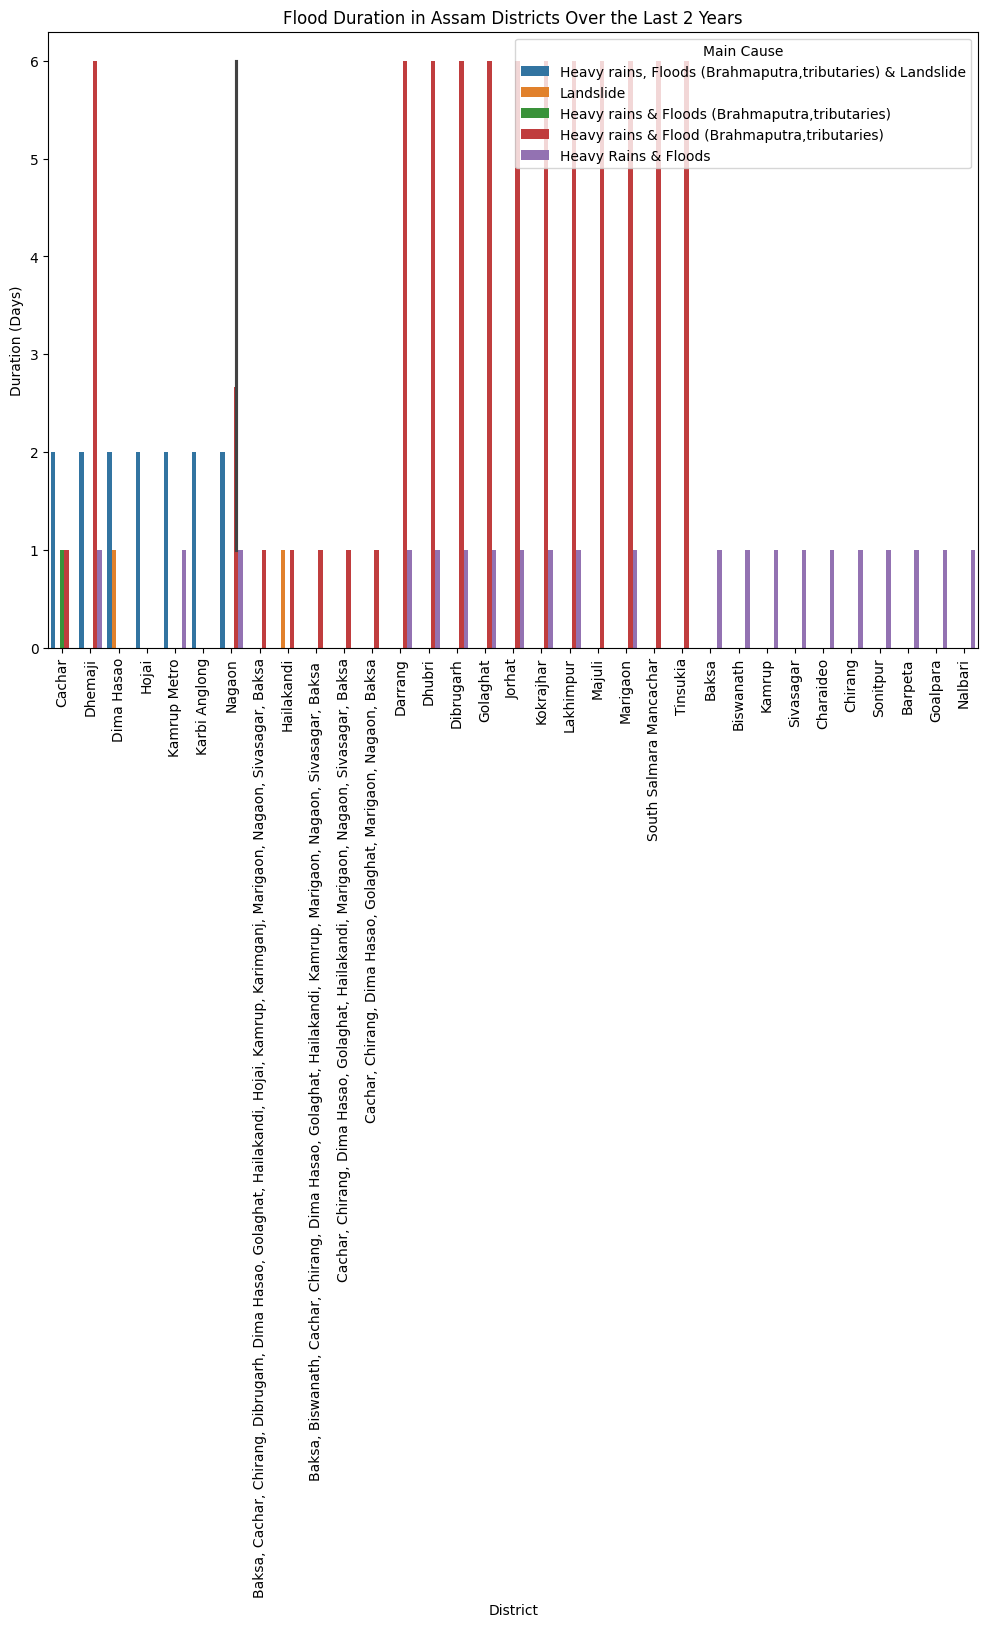

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Extract attributes from the provided dictionary
location_info = {"state": "UTTARAKHAND", "district": "DEHRADUN", "station": "MUSSOORIE(UKG)_UKG"}
state = location_info["state"]
district = location_info["district"]
station = location_info["station"]

print(f"State: {state}")
print(f"District: {district}")
print(f"Station: {station}")

# Load the dataset
data = pd.read_csv('India_Flood_Inventory_v3.csv')

# Strip any whitespace from the column names
data.columns = data.columns.str.strip()

# Convert the 'Start Date' and 'End Date' columns to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Define the date range for the last 2 years
two_years_ago = datetime.now() - timedelta(days=2*365)

# Filter for rows where the state is 'Assam' and the start date is within the last 2 years
filtered_data = data[
    (data['State'].str.strip().str.lower() == 'assam') &
    (data['Start Date'] >= two_years_ago)
]

# Select the required columns
filtered_data = filtered_data[['Districts', 'Start Date', 'End Date', 'Duration(Days)', 'Main Cause']]

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Districts', y='Duration(Days)', hue='Main Cause', data=filtered_data, dodge=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Flood Duration in Assam Districts Over the Last 2 Years')
plt.xlabel('District')
plt.ylabel('Duration (Days)')

# Save the plot as an image file
plt.legend(title='Main Cause')
plt.tight_layout()
plt.show()


In [ ]:
print(filtered_data.to_excel)

<bound method NDFrame.to_excel of          Districts Start Date   End Date  Duration(Days)  \
5161        Cachar 2022-12-05        NaT             2.0   
5162       Dhemaji 2022-12-05        NaT             2.0   
5163    Dima Hasao 2022-12-05        NaT             2.0   
5164         Hojai 2022-12-05        NaT             2.0   
5165  Kamrup Metro 2022-12-05        NaT             2.0   
...            ...        ...        ...             ...   
6467        Kamrup 2023-02-09 2023-02-09             1.0   
6468  Kamrup Metro 2023-02-09 2023-02-09             1.0   
6469      Marigaon 2023-02-09 2023-02-09             1.0   
6470        Nagaon 2023-02-09 2023-02-09             1.0   
6471     Sivasagar 2023-02-09 2023-02-09             1.0   

                                             Main Cause  
5161  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5162  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5163  Heavy rains, Floods (Brahmaputra,tributaries) ...  
5164  Heavy r

<ipython-input-9-10a723c8b3ae>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


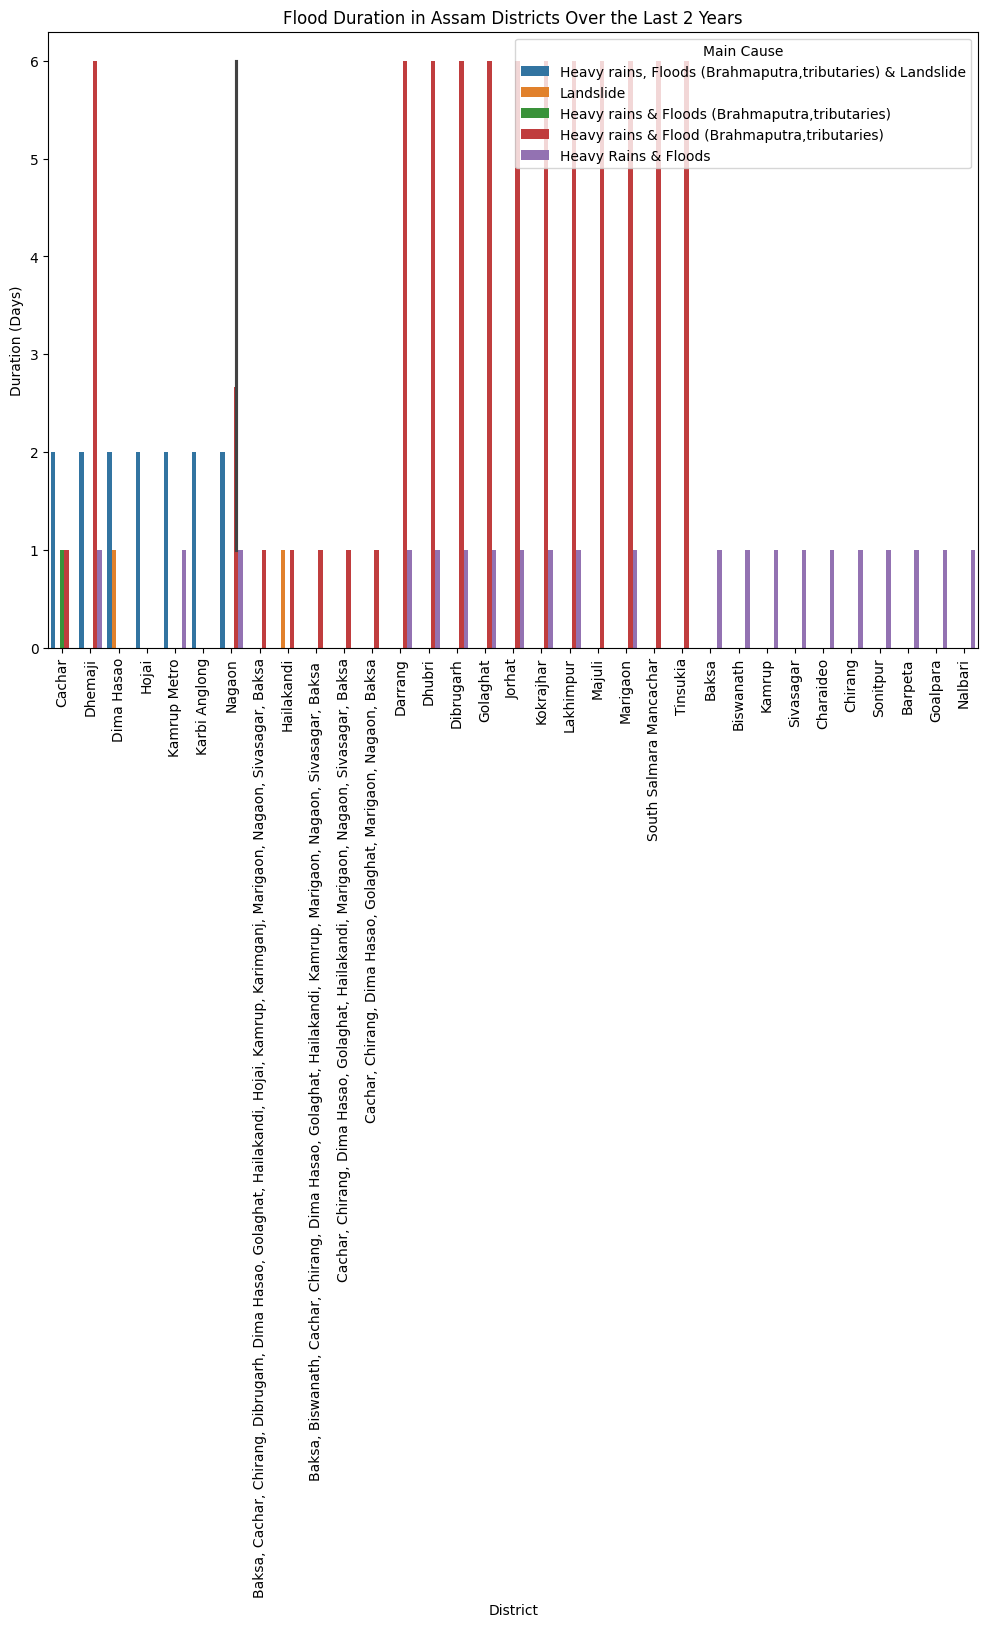

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('India_Flood_Inventory_v3.csv')

# Strip any whitespace from the column names
data.columns = data.columns.str.strip()

# Convert the 'Start Date' and 'End Date' columns to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')

# Define the date range for the last 2 years
two_years_ago = datetime.now() - timedelta(days=2*365)

# Filter for rows where the state is 'Assam' and the start date is within the last 2 years
filtered_data = data[
    (data['State'].str.strip().str.lower() == 'assam') &
    (data['Start Date'] >= two_years_ago)
]

# Select the required columns
filtered_data = filtered_data[['Districts', 'Start Date', 'End Date', 'Duration(Days)', 'Main Cause']]

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Districts', y='Duration(Days)', hue='Main Cause', data=filtered_data, dodge=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Flood Duration in Assam Districts Over the Last 2 Years')
plt.xlabel('District')
plt.ylabel('Duration (Days)')

# Save the plot as an image file
plt.legend(title='Main Cause')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import datetime
from google.colab import files
from urllib.parse import quote

# Define end date as today and start date as 2 years ago
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)

locations = filtered_data
all_dataframes = []

for loc in locations:
    state = loc["state"]
    district = loc["district"]
    station = loc["station"]

    url = "http://aws.imd.gov.in:8091/AWS/dataview.php?a=AWS&b={}&c={}&d={}&e={}&f={}&g=ALL_HOUR&h=ALL_MINUTE".format(
        quote(state), quote(district), quote(station), start_date, end_date
    )
    print(f"Fetching data from URL: {url}")

    try:
        df_list = pd.read_html(url)
        if not df_list:
            print(f"No data found for {station}")
            continue

        for df in df_list:
            df["State"] = state
            df["District"] = district
            df["Station"] = station
            all_dataframes.append(df)
            print(f"Data fetched for {station}")
    except Exception as e:
        print(f"Failed to fetch data for {station}. Error: {e}")

if all_dataframes:
    final_df = pd.concat(all_dataframes, ignore_index=True)

    excel_file = 'IMD_data_multiple_location.xlsx'
    with pd.ExcelWriter(excel_file, engine='xlsxwriter') as writer:
        final_df.to_excel(writer, sheet_name='All_Data', index=False)

    print(f'Data saved to {excel_file}')

    files.download(excel_file)
else:
    print("No data fetched for any location.")

TypeError: string indices must be integers